In [1]:
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")
from electronfactors.ellipse.equivalent import equivalent_ellipse
from electronfactors.visuals.print_to_scale import print_to_pdf
from electronfactors.visuals.shape_display import display_equivalent_ellipse, display_shapely, make_ellipse
from electronfactors.visuals.utilities import make_shapely

In [2]:
with open("imported_data/parameterised.yml", 'r') as file:
    cutout_data = yaml.load(file)

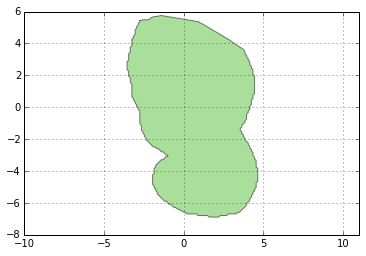

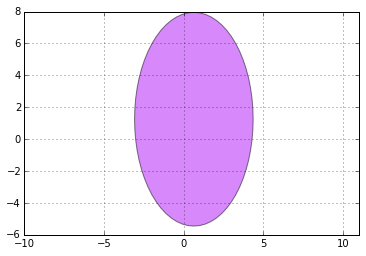

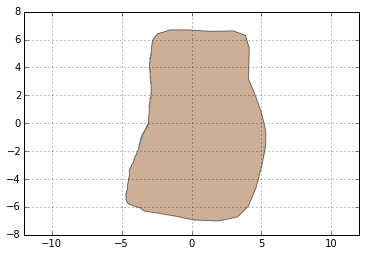

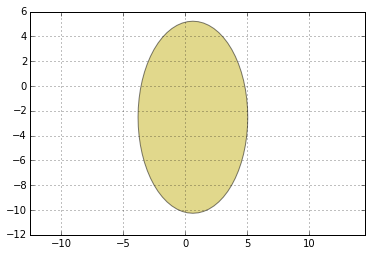

In [3]:
shapes_to_print = dict()

key_list = ['P15_1', 'P38_3']
for i, key in enumerate(key_list):  
    shapes_to_print[key] = []
    
    cutout = make_shapely(**cutout_data[key])
    shapes_to_print[key].append(cutout)
    display_shapely(cutout)
    
    ellipse = make_ellipse(**cutout_data[key])
    shapes_to_print[key].append(ellipse)
    display_shapely(ellipse)

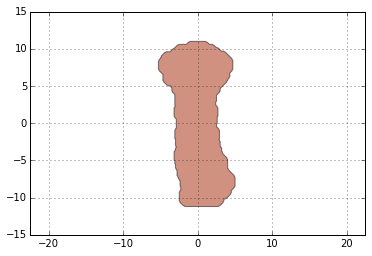

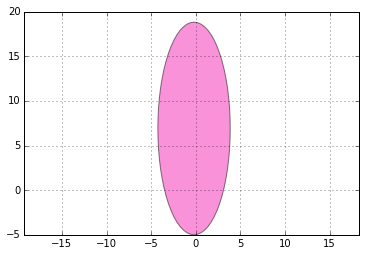

In [4]:
key = 'P41'

shapes_to_print['P41_cutout'] = []
cutout = make_shapely(**cutout_data[key])
shapes_to_print['P41_cutout'].append(cutout)
display_shapely(cutout)


shapes_to_print['P41_ellipse'] = []
ellipse = make_ellipse(**cutout_data[key])
shapes_to_print['P41_ellipse'].append(ellipse)
display_shapely(ellipse)

In [5]:
custom_data = dict()

key = '6cm Square'
custom_data[key] = dict()
custom_data[key]['XCoords'] = np.array([-0.5, 0.5, 0.5, -0.5]) * 6
custom_data[key]['YCoords'] = np.array([0.5, 0.5, -0.5, -0.5]) * 6

key = '3.5cm Square'
custom_data[key] = dict()
custom_data[key]['XCoords'] = np.array([-0.5, 0.5, 0.5, -0.5]) * 3.5
custom_data[key]['YCoords'] = np.array([0.5, 0.5, -0.5, -0.5]) * 3.5

key = '3x6cm Rectangle'
custom_data[key] = dict()
custom_data[key]['XCoords'] = np.array([-0.5, 0.5, 0.5, -0.5]) * 3
custom_data[key]['YCoords'] = np.array([0.5, 0.5, -0.5, -0.5]) * 6

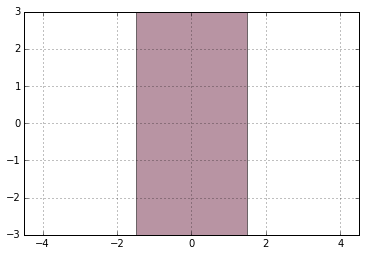

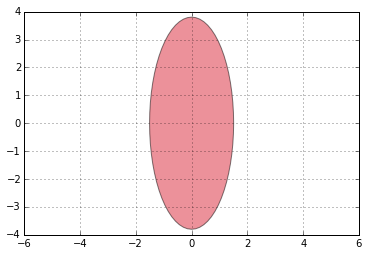

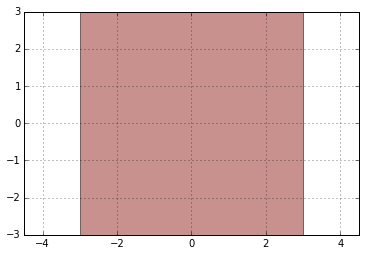

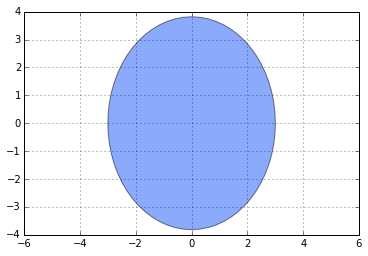

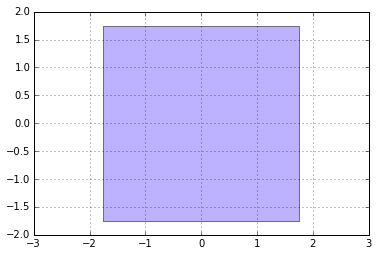

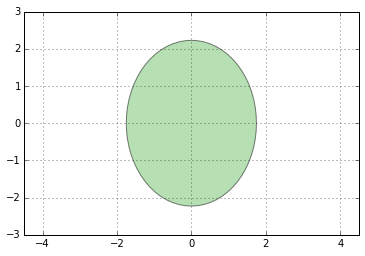

In [6]:
for i, key in enumerate(custom_data):
    shapes_to_print[key] = []
    
    cutout = make_shapely(**custom_data[key])
    shapes_to_print[key].append(cutout)
    display_shapely(cutout)    
    
    ellipse_raw = equivalent_ellipse(**custom_data[key])
    ellipse = make_ellipse(**ellipse_raw)
    shapes_to_print[key].append(ellipse)
    display_shapely(ellipse)

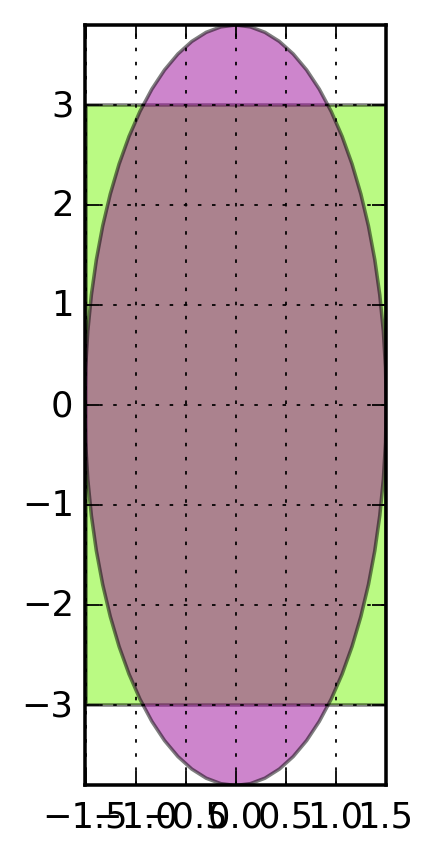

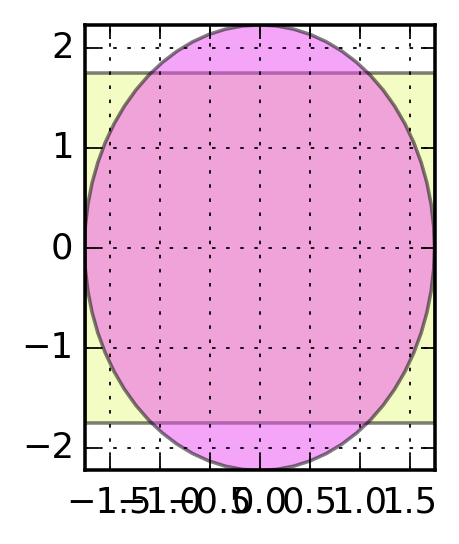

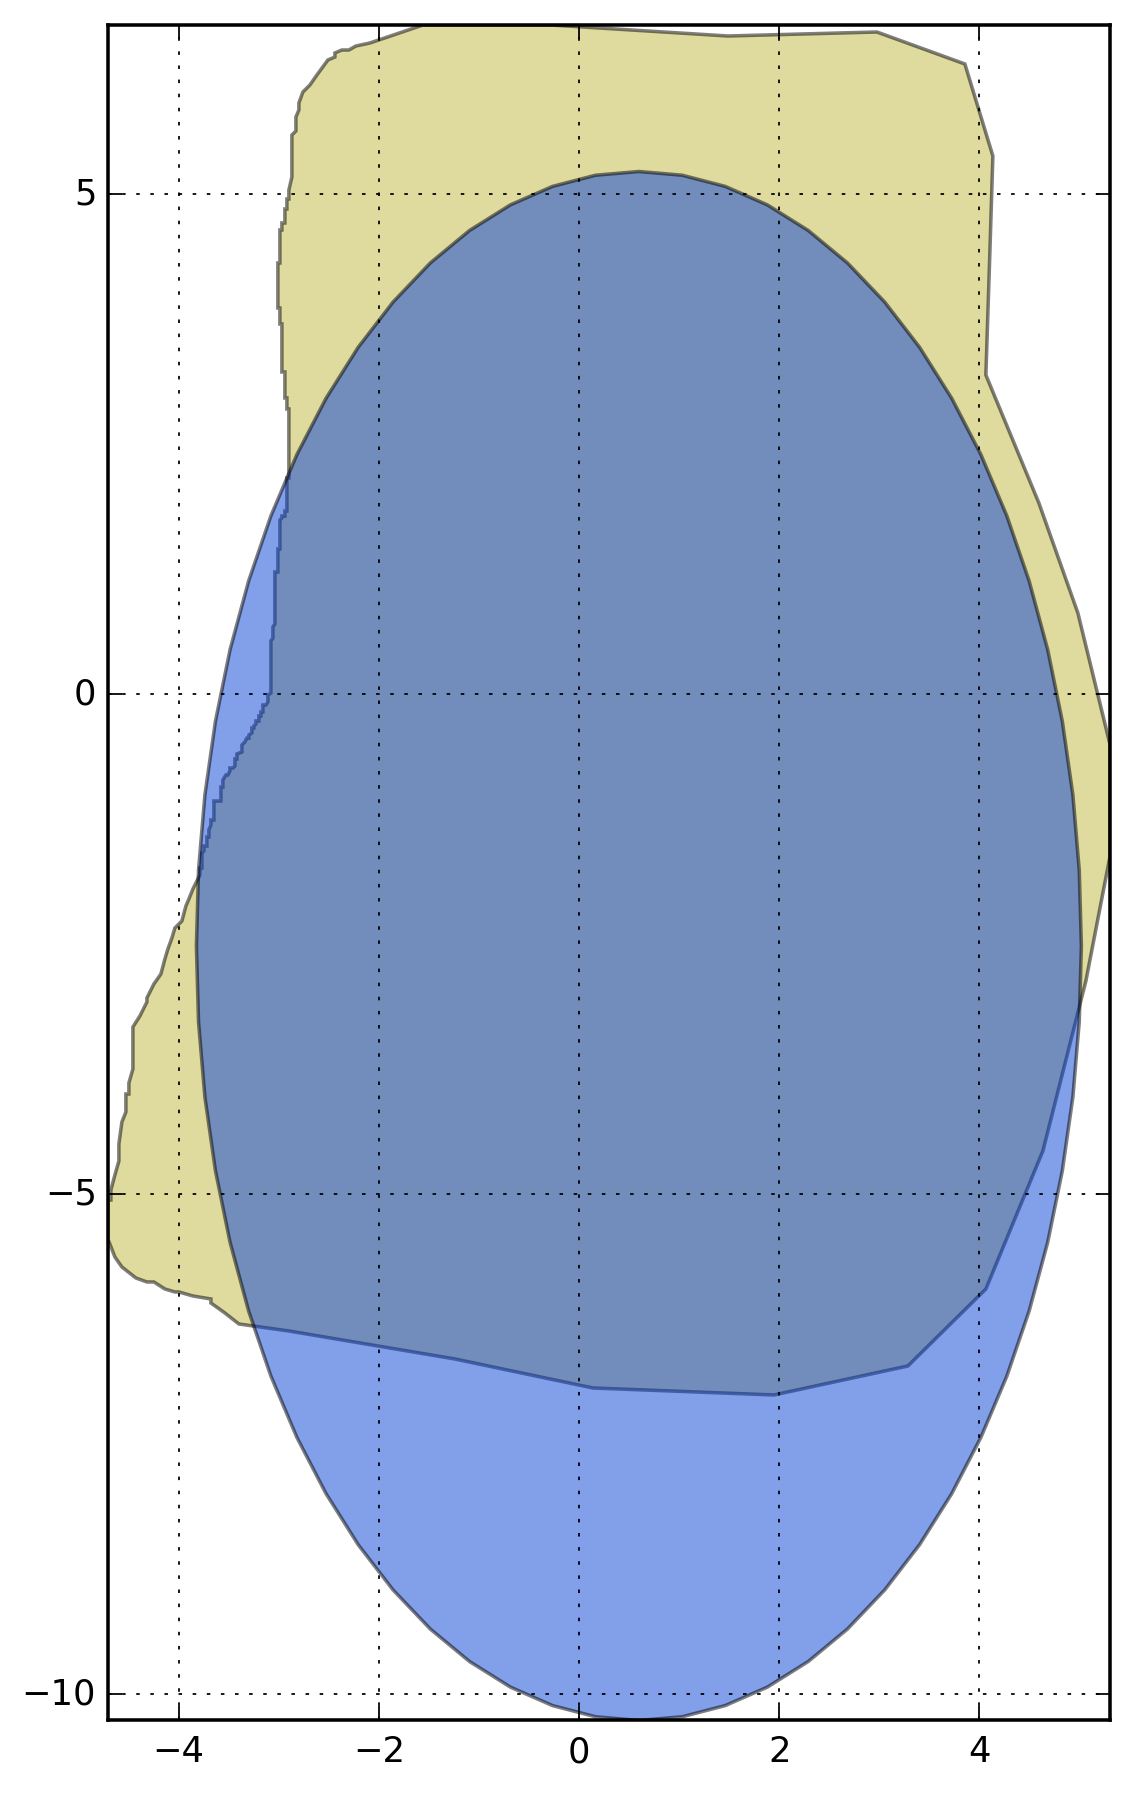

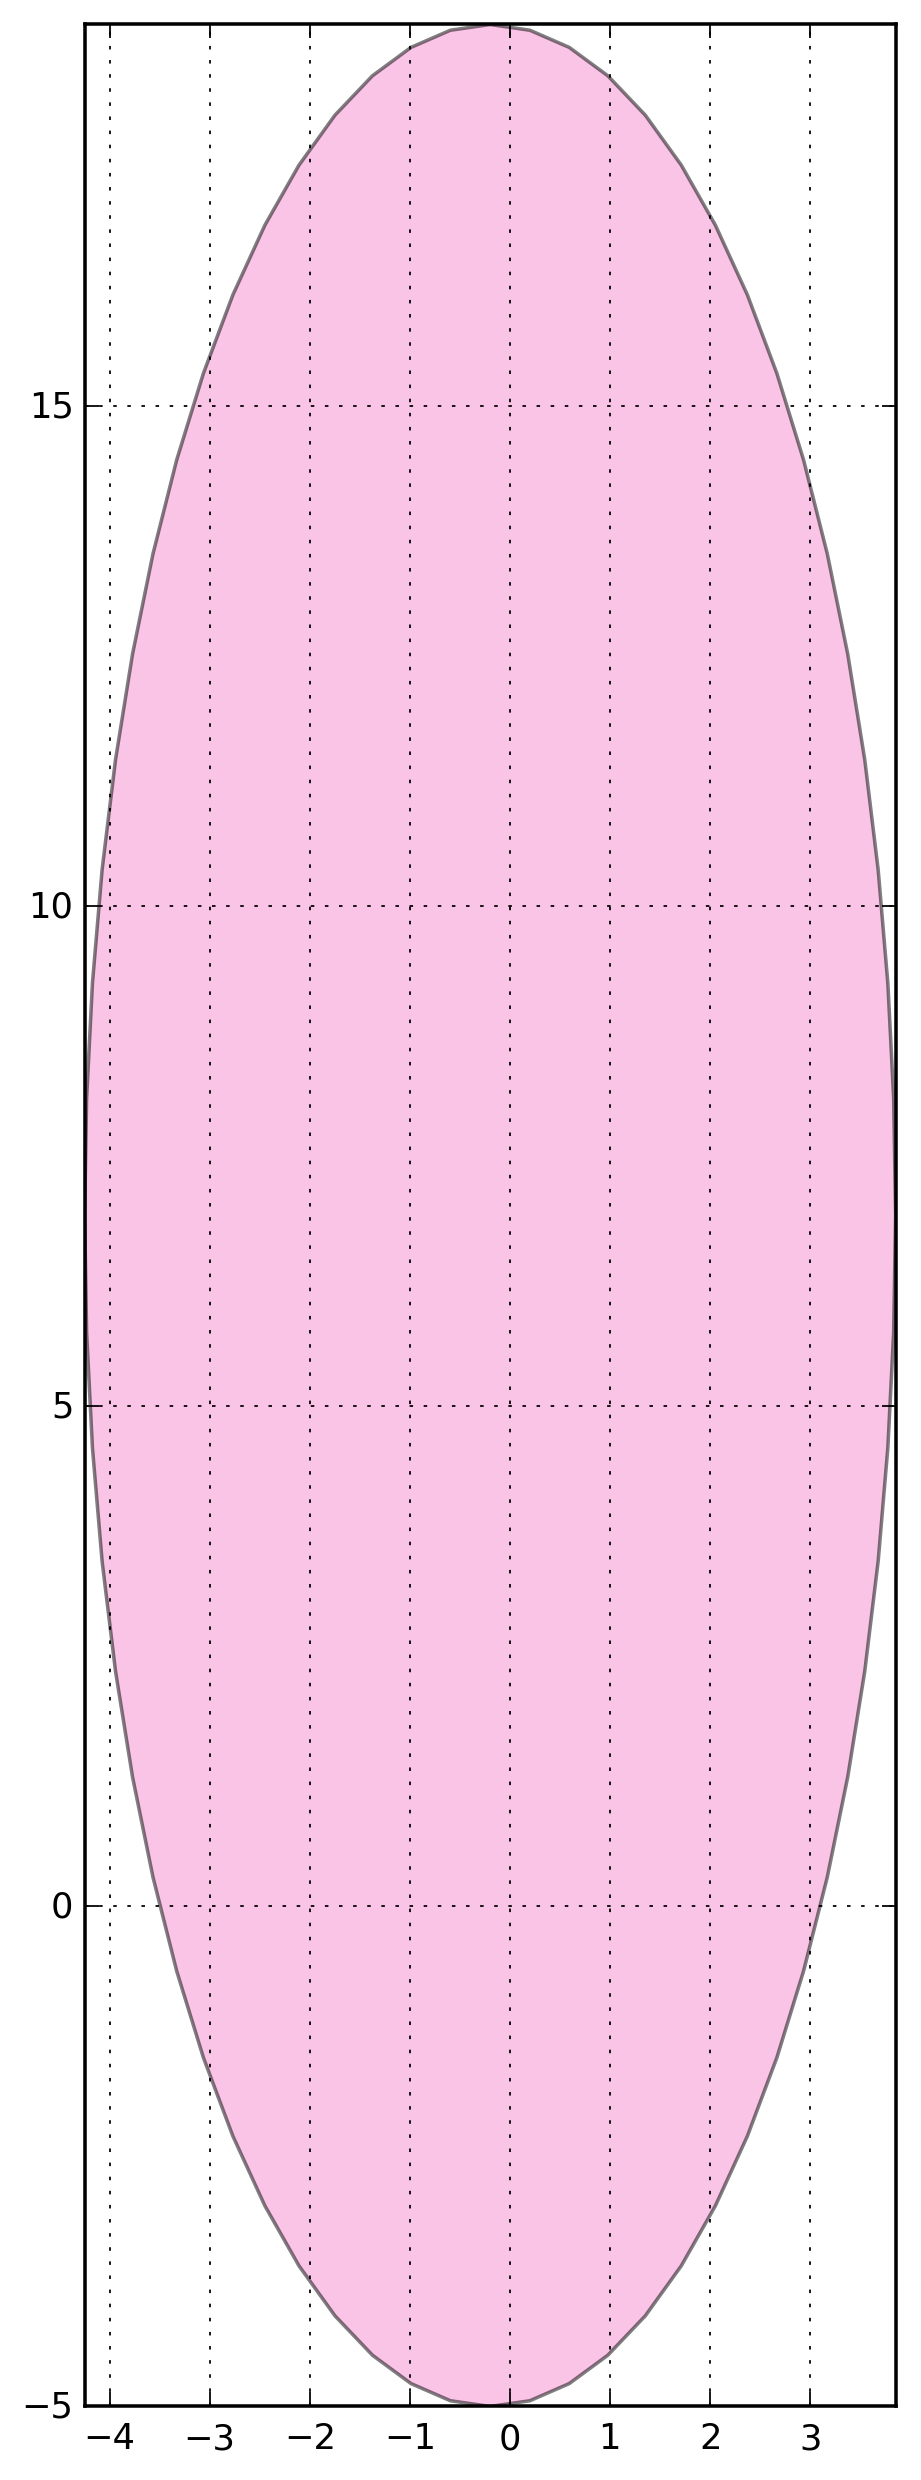

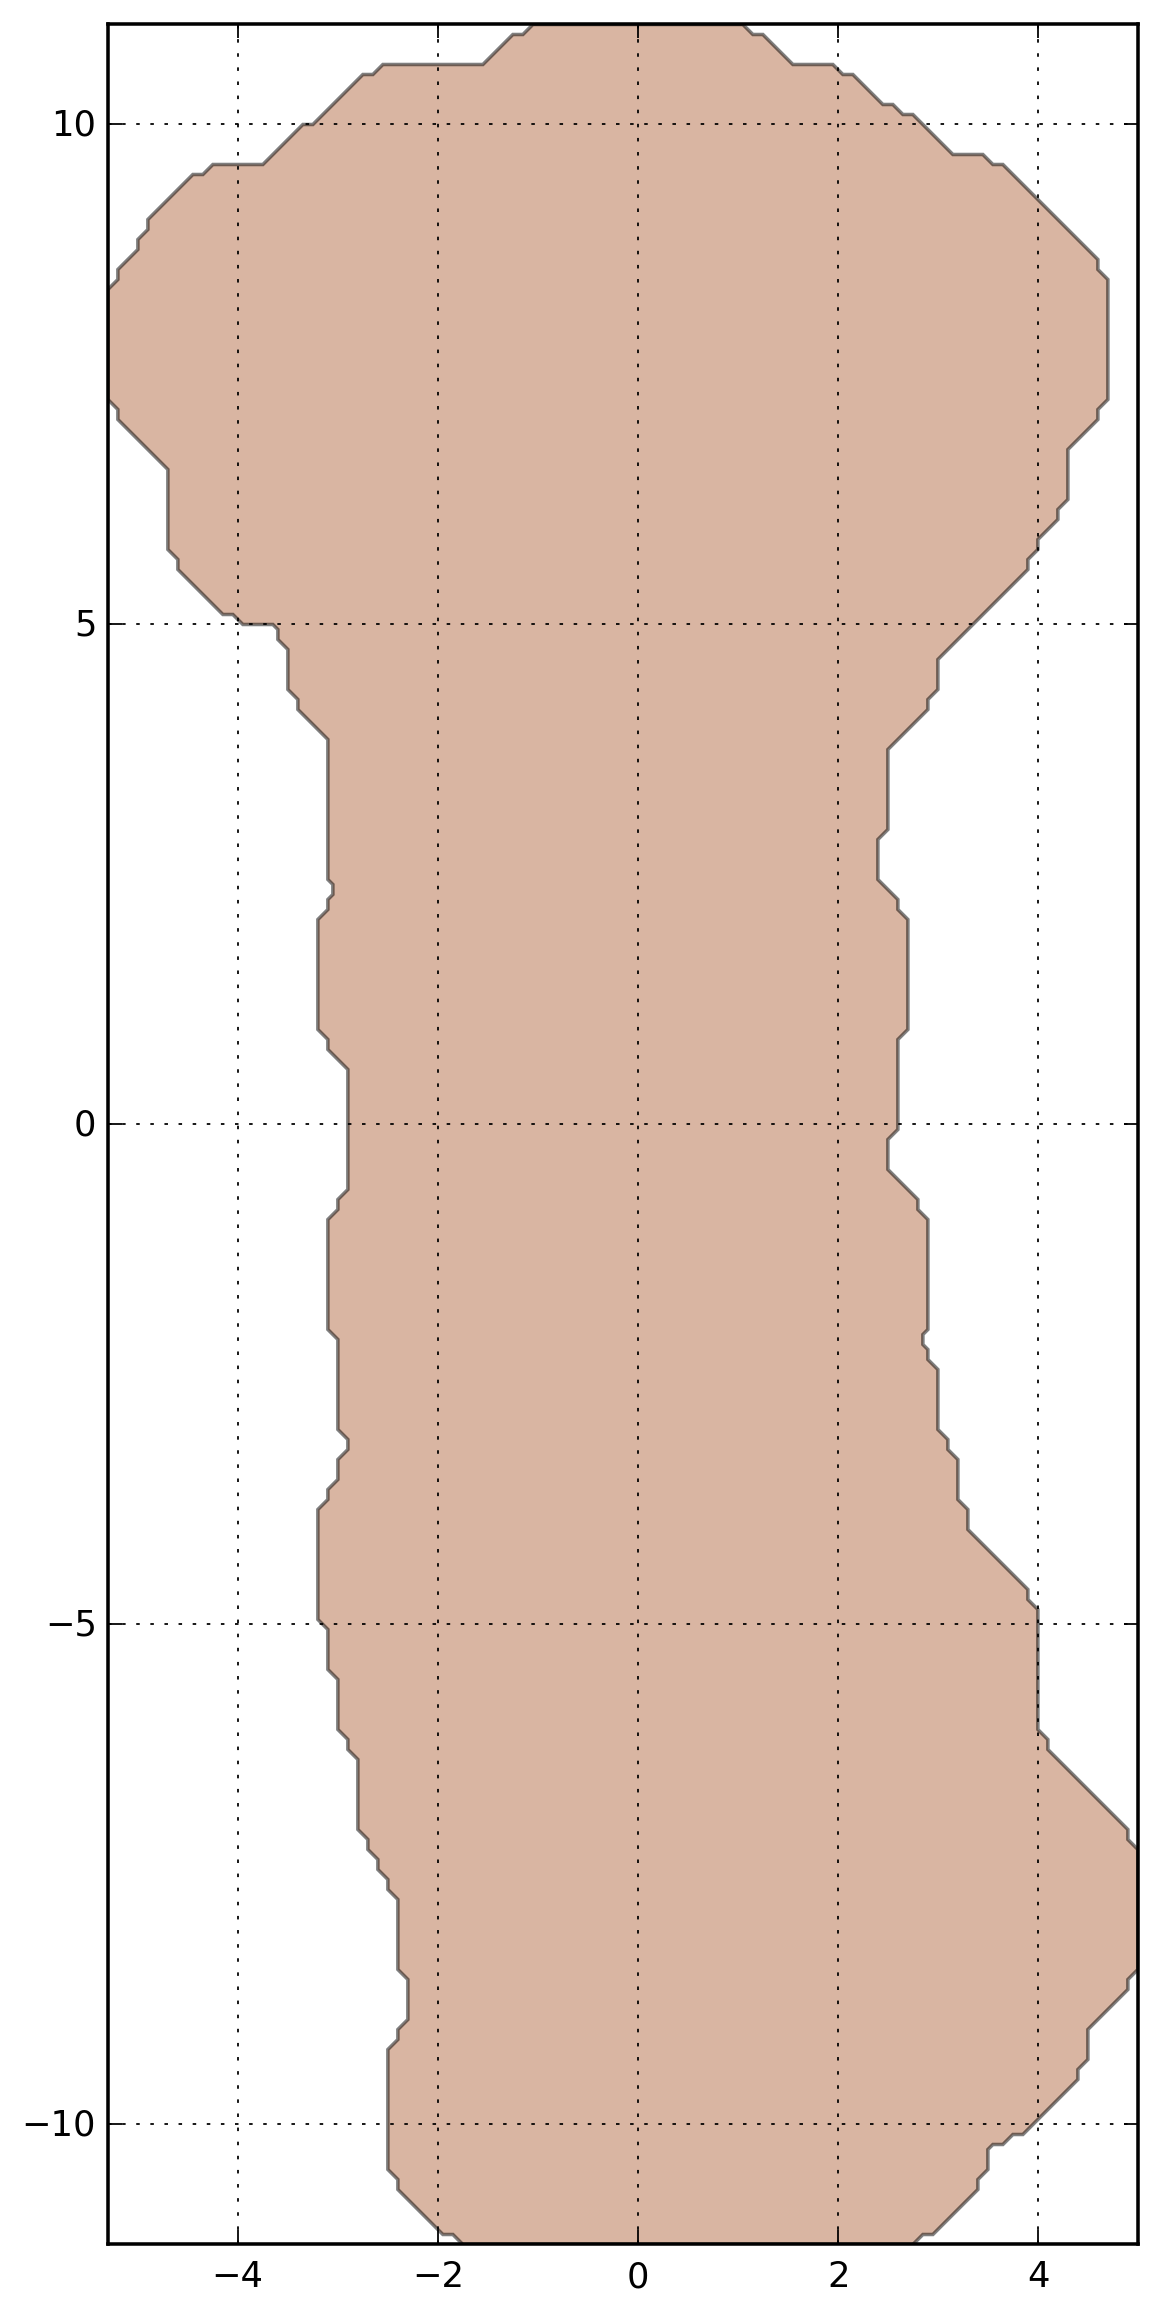

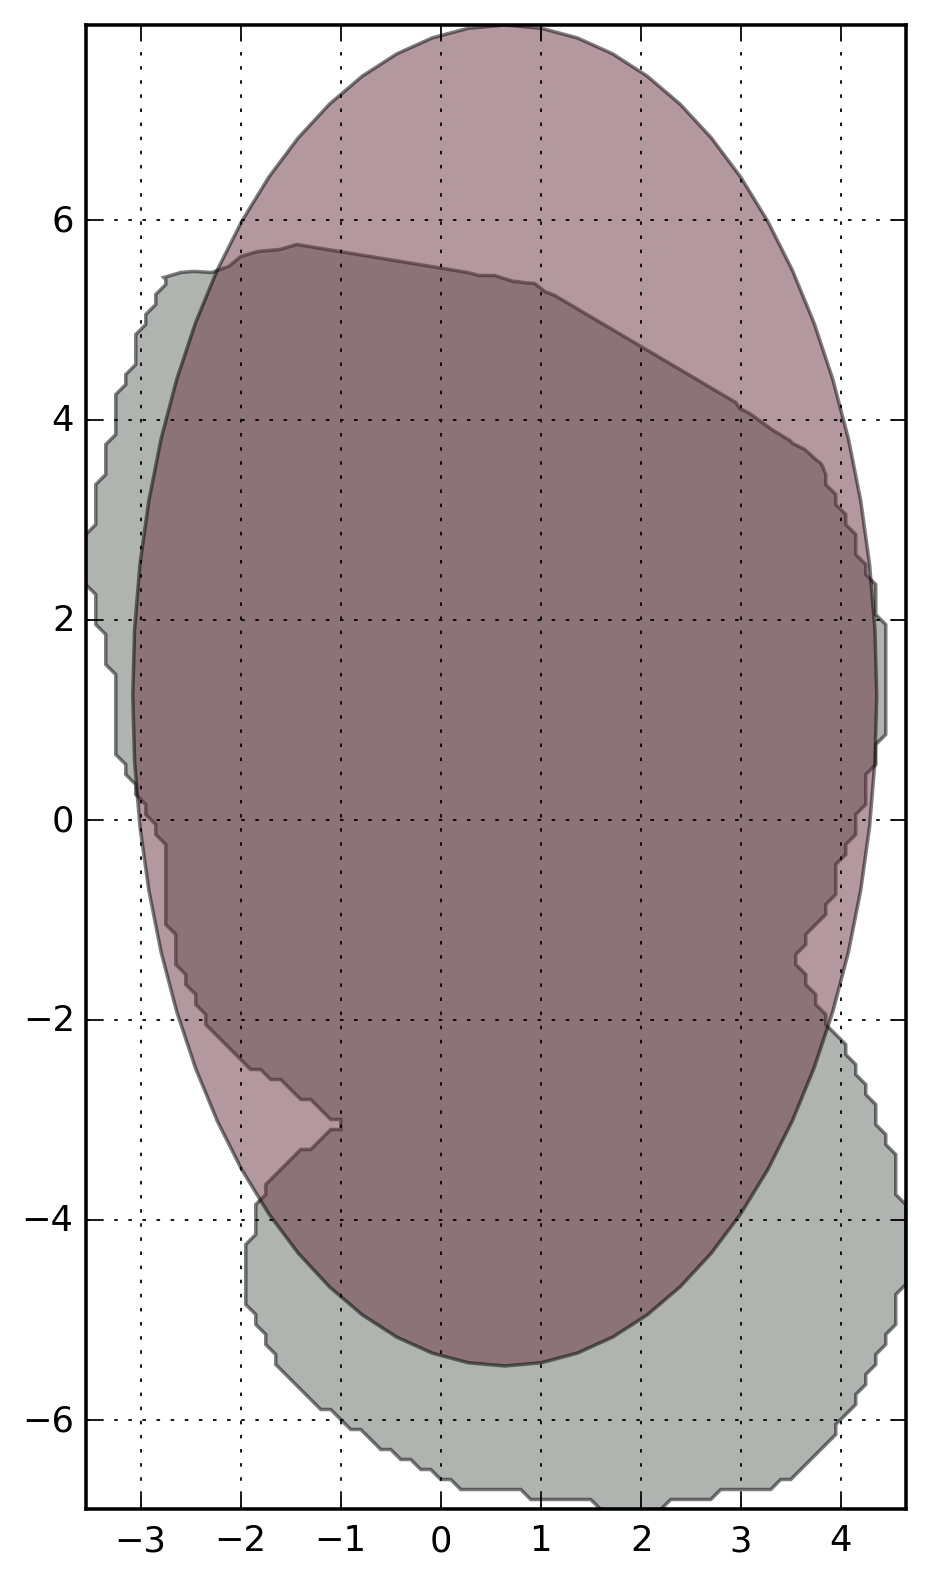

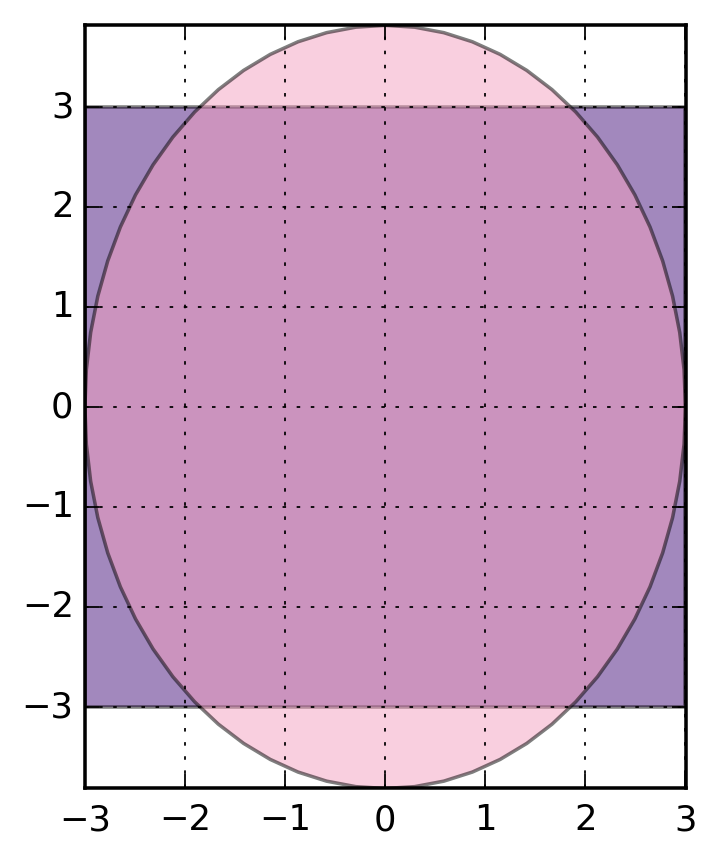

In [7]:
for i, key in enumerate(shapes_to_print):
    filename = str(key) + ".pdf"
    print_to_pdf(shapes_to_print[key], filename)